In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# enrich transaction data with customer data

In [4]:
df_bookings = pd.read_csv("data/df_bookings_cleaned.csv")
df_custs = pd.read_csv("data/customer_information_cleaned.csv")
df_mapping = pd.read_csv("data/mapping_account_to_customer.csv")

In [17]:
df_bookings.head()

,account,transaction_type_code,booking_amount,booking_datetime_utc,counterparty_iban,counterparty_name,crdt_dbit
0,8cb467ebb0c9ab36c2e8b16f641261da,po,10.62,2024-01-29 14:07:46,NLFAKEYSXS4593365850,9fd29e915875d3483d957a80b708be2e,crdt
1,567836a47eeccfa4a3bf07eb76555df3,pt,241.94,2023-05-10 19:56:14,NLFAKELPTK6013528475,91816c8c2cd84d5c749cadef5a7df89a,dbit
2,e8b94ce0426594b226e260d2fffc33f6,po,162.49,2023-04-23 22:05:01,NLFAKEGDAF5939009823,cf2d659764891c71be7573f6b9acbf92,crdt
3,57f5f510b4ca6d69fac0e18ab2d38313,pt,552.06,2023-10-26 12:58:47,NLFAKESQCM9853487776,2b885cd569a8d69e217fd773bcb87b9d,crdt
4,e23fe9638bfa32c3c8eddc856c77443f,pt,321.83,2024-04-03 01:55:07,NLFAKEBOMU3100767392,48c2ba56a207ad4041b3d2e7b6d2ca6a,dbit


In [5]:
df_mapping.head()

,account,customer
0,74bcb6cecf3262d65e3b0d699d54a02c,61af663c-ed2e-4bcd-8c06-df90aa1c4023
1,ece1ff028280aebae9edfb7e036d5af2,e9d68f23-b489-4070-b914-f8a8bea4ff31
2,3933695939df3216249172b2c6627805,806a29ad-f6b2-4778-be50-8d4d293a60be
3,2101cdde2c259f7dd995b5d659a16fc4,440dd09f-c2e8-4fc2-b649-6cdefca54576
4,4992ed79597fd9cc8b610685c9c4fc4d,0722ab3c-18c3-4aa9-a013-5044a041301d


In [10]:
df_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5056 entries, 0 to 5055
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   account   5056 non-null   object
 1   customer  5056 non-null   object
dtypes: object(2)
memory usage: 79.1+ KB


In [7]:
df_mapping.groupby("account")["customer"].nunique().reset_index(name="distinct_customers").sort_values("distinct_customers", ascending=False)

,account,distinct_customers
1916,7733de4799fed7dc928239af7200de93,2
1821,722abaf57d0f3f7bdb92a385ed9b07da,2
1970,7b056183b6747148a80ac32c03600024,2
1949,791f879d1213c032a7855a68d1be2f70,2
1161,48beaf5d8eaa779d9ffe7585a999d912,2
...,...,...
51,03a6035c4f27674eb90595897f2d36f7,1
52,03c31a06f80fbe7c4c2ef84d2cbd60ba,1
53,03c7cef71de3058027409b58ab4fb7f1,1
54,03f9866f206073d2eb2606aef53813b5,1


In [9]:
df_mapping.groupby("customer")["account"].nunique().reset_index(name="distinct_accounts").sort_values("distinct_accounts", ascending=False)

,customer,distinct_accounts
497,1e5bc68b-1931-46f5-ba4d-45fded360bb7,4
371,170d7507-05ee-41d4-bf53-a88e4efc8248,4
1392,5a45b8cc-117d-4f63-8e8b-84ebe9e24240,4
538,2086ba87-0bf2-498c-a1be-4ca5cadaf90f,4
738,2d3b840d-a0db-41ff-91c7-0935f03256d8,4
...,...,...
43,0289a49c-e036-400d-a4fd-da37ce635ae0,1
44,028ccae1-e0b8-4731-b454-4a6a372cba50,1
629,260e37cc-6287-4624-a433-1510ad21b4cc,1
46,02b622e9-808e-48d2-9d26-4b1b6593b659,1


In [11]:

accounts_multi_customers = (
    df_mapping.groupby("account")["customer"]
              .nunique()
              .reset_index(name="distinct_customers")
              .query("distinct_customers > 1")
)


In [15]:
accounts_multi_customers.sort_values("distinct_customers", ascending=False)

,account,distinct_customers
14,011d0df726c28f78d8e034047334c4cd,2
15,011e43f1ee5839c5c6f103116a37dbd3,2
16,0138ea4161814bac23f5d7c7714fc3c1,2
18,0147807f9682ce19f5acfe82fd710fdc,2
19,014ed858a9759a86fbb2a926eb0de5c4,2
...,...,...
4039,feb683928dba20b4d0dca4b8e69b1507,2
4040,fedecedfca31329336db3d3e55359e7d,2
4044,ff121a061b19aab5b85123176997bb25,2
4050,ff7af8db5c0de15ec07fc3e6f659bc7a,2


In [13]:
customers_multi_accounts = (
    df_mapping.groupby("customer")["account"]
              .nunique()
              .reset_index(name="distinct_accounts")
              .query("distinct_accounts > 1")
)

In [16]:
customers_multi_accounts.sort_values("distinct_accounts", ascending=False)

,customer,distinct_accounts
371,170d7507-05ee-41d4-bf53-a88e4efc8248,4
1570,668b179f-7e11-43ab-91cf-c46bc037c059,4
538,2086ba87-0bf2-498c-a1be-4ca5cadaf90f,4
846,354f9914-5698-47e3-b16d-a24334def7ee,4
543,20bf262b-4f4c-4fe8-acc1-8e4d83992e41,4
...,...,...
3917,fdf48930-a265-4f65-8d56-e00031456a6c,2
3921,fe1be3e9-bee1-4c65-b7a3-19c6619c4a06,2
335,14c6e496-9146-470a-a69d-2c2229861808,2
338,1519830c-4019-4303-9c45-7e4da79313b8,2


In [18]:
df_bookings_with_cust = pd.merge(df_bookings, df_mapping, on = 'account', how = 'left')

In [19]:
df_bookings_with_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   account                8370 non-null   object 
 1   transaction_type_code  8370 non-null   object 
 2   booking_amount         8370 non-null   float64
 3   booking_datetime_utc   8370 non-null   object 
 4   counterparty_iban      8230 non-null   object 
 5   counterparty_name      8230 non-null   object 
 6   crdt_dbit              8370 non-null   object 
 7   customer               8370 non-null   object 
dtypes: float64(1), object(7)
memory usage: 523.3+ KB


In [20]:
df_bookings_with_cust[df_bookings_with_cust['account'] == '011d0df726c28f78d8e034047334c4cd'] # gives duplicates

,account,transaction_type_code,booking_amount,booking_datetime_utc,counterparty_iban,counterparty_name,crdt_dbit,customer
7953,011d0df726c28f78d8e034047334c4cd,po,483.24,2023-09-06 07:31:36,NLFAKEOFSC4741099780,f71bc9103fbe23fc95ce66f8bc5fc968,dbit,aab76dd1-152b-4e5f-a499-9ab5002a99b2
7954,011d0df726c28f78d8e034047334c4cd,po,483.24,2023-09-06 07:31:36,NLFAKEOFSC4741099780,f71bc9103fbe23fc95ce66f8bc5fc968,dbit,15969802-b6dd-4257-bb7d-9f1c57eb89b1


## compute trx features on account level, then group by customers

- i first compute account level features and then agg on customer lvl (taking the median)

In [79]:
median_amt = df_bookings.groupby(['account'])['booking_amount'].median().rename('median_amt')
count = df_bookings.groupby(['account']).size().reset_index(name='count')

In [75]:
median_amt

account
001893bc8e10aa30ca9d12d39084c1bb    517.500
00557cda50fb338ba418385a876b7976    251.700
00654bc9a5a7c643cdac0225a6aceda1    440.085
0069564dc6742b9133a87ac584bf7b6f     30.220
007c6824debf3f80be8acfb8f2f99409    551.230
                                     ...   
ff94c73c33dc7493aa9a9b842980117e    797.595
ffc379ebca60968aa07c09d582bcf19b    562.020
ffc69c92d3a647133fff46aba209afe1    886.860
ffd3b07c57b45f4e063d20fc81a0c302    890.600
ffe5a7fbff4964c5f122286772d3f8f3    789.715
Name: median_amt, Length: 4056, dtype: float64

In [80]:
count

,account,count
0,001893bc8e10aa30ca9d12d39084c1bb,1
1,00557cda50fb338ba418385a876b7976,1
2,00654bc9a5a7c643cdac0225a6aceda1,2
3,0069564dc6742b9133a87ac584bf7b6f,1
4,007c6824debf3f80be8acfb8f2f99409,1
...,...,...
4051,ff94c73c33dc7493aa9a9b842980117e,2
4052,ffc379ebca60968aa07c09d582bcf19b,3
4053,ffc69c92d3a647133fff46aba209afe1,1
4054,ffd3b07c57b45f4e063d20fc81a0c302,1


In [77]:
df_mapping_with_amt = pd.merge(df_mapping, median_amt, on = 'account', how = 'left')

In [81]:
df_mapping_with_count = pd.merge(df_mapping_with_amt, count, on = 'account', how = 'left')

In [82]:
df_mapping_with_count

,account,customer,median_amt,count
0,74bcb6cecf3262d65e3b0d699d54a02c,61af663c-ed2e-4bcd-8c06-df90aa1c4023,730.220,1
1,ece1ff028280aebae9edfb7e036d5af2,e9d68f23-b489-4070-b914-f8a8bea4ff31,603.175,2
2,3933695939df3216249172b2c6627805,806a29ad-f6b2-4778-be50-8d4d293a60be,154.030,1
3,2101cdde2c259f7dd995b5d659a16fc4,440dd09f-c2e8-4fc2-b649-6cdefca54576,38.840,1
4,4992ed79597fd9cc8b610685c9c4fc4d,0722ab3c-18c3-4aa9-a013-5044a041301d,614.450,1
...,...,...,...,...
5051,e46c867df0d7b6c271614b0727fae5d5,20d4ba18-93a0-4478-800b-19de38db128d,405.120,1
5052,1b067a62037ca7782dd51a3d1141d8a1,b8d7e825-bd6f-4707-b17d-64df35e8f24a,20.350,1
5053,1e458e2c5a047531ffdff9136bcd37ad,bd32ebda-b61e-4c80-b302-225ec930c9f3,709.730,3
5054,e82823ae1550f6b8fc10c4be7f520268,6e3c4532-1434-4f62-acac-028cba220065,607.565,2


In [85]:

df_customer_level = (
    df_mapping_with_count.groupby("customer")
      .agg(
          median_cust = ("median_amt", "median"),
          count_cust  = ("count", "median")   
      )
      .reset_index()
)


In [86]:
df_customer_level

,customer,median_cust,count_cust
0,000cd21a-65a7-4a30-b5b7-0dd9728f5897,445.505,2.0
1,001e7006-29d3-44d6-9a59-6f63141ec659,293.970,2.0
2,0029691e-0c18-4305-8341-f831ea4a742b,483.170,3.0
3,004f5362-244f-4ce3-aa50-18b5d623c671,590.840,1.0
4,0067eaa6-483d-453a-bc9d-b77e398c31c0,551.220,1.0
...,...,...,...
3947,ff8abfc0-2d58-493a-aebe-15241549d4d7,445.290,1.0
3948,ff9558a3-8d1d-482e-8e6b-24396a1e5d9a,858.480,1.0
3949,ffa361be-0f92-40e1-87f9-7d05f6ca6b8b,661.705,2.0
3950,ffa623d0-ea9e-4c8d-b1a8-b71f491b90e9,998.180,1.0


In [87]:
df_customer_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer     3952 non-null   object 
 1   median_cust  3952 non-null   float64
 2   count_cust   3952 non-null   float64
dtypes: float64(2), object(1)
memory usage: 92.8+ KB


## join to customer df

In [88]:
df_custs_features = pd.merge(df_custs, df_customer_level, on = 'customer', how = 'inner')

In [89]:
df_custs_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3943 entries, 0 to 3942
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     3943 non-null   int64  
 1   customer                       3943 non-null   object 
 2   date_of_birth                  3943 non-null   object 
 3   bank_code                      3943 non-null   int64  
 4   gender                         3943 non-null   object 
 5   country_of_birth_code          3943 non-null   object 
 6   housing_tenure_type            3943 non-null   object 
 7   social_status                  3943 non-null   object 
 8   country_of_residence_code      3943 non-null   object 
 9   customer_relation_status_type  3943 non-null   object 
 10  median_cust                    3943 non-null   float64
 11  count_cust                     3943 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage:

# create customer level features

In [90]:
df_custs_features.head()

,Unnamed: 0,customer,date_of_birth,bank_code,gender,country_of_birth_code,housing_tenure_type,social_status,country_of_residence_code,customer_relation_status_type,median_cust,count_cust
0,0,0534a101-8ddc-4719-81f3-8dd4fd034ada,1989-03-13,3773,Male,NL,Rents house,Unemployed,NL,Customer,179.8500,1.0
1,1,a9151364-778a-469f-8b68-d94d40da9c7d,1996-10-12,1476,Male,unknown,Does not own house (no longer active),Unknown,NL,Prospective customer,286.5200,1.0
2,2,7317591a-3283-4aa4-a212-ab7c9d361cb6,1951-05-28,3264,Female,unknown,Lives in,Unemployed,NL,Prospective customer,445.8875,2.0
3,3,bfddc3d9-9ee3-4c2a-b94d-62046808593f,1968-07-14,1378,Female,NL,Does not own house (no longer active),Unknown,NL,Prospective customer,352.1250,2.0
4,4,32d4d3a5-98dd-4c3c-a4ce-b832c8776e4b,1996-03-31,1161,Female,unknown,Owns house,Unknown,NO,Ex customer,199.3800,1.0


In [91]:
df_custs_features.columns

Index(['Unnamed: 0', 'customer', 'date_of_birth', 'bank_code', 'gender',
       'country_of_birth_code', 'housing_tenure_type', 'social_status',
       'country_of_residence_code', 'customer_relation_status_type',
       'median_cust', 'count_cust'],
      dtype='object')

In [95]:
df_clean = df_custs_features.drop(columns=['Unnamed: 0']).set_index('customer')

In [98]:
features = ['housing_tenure_type', 'customer_relation_status_type','median_cust', 'count_cust']

In [100]:
df_clean_features = df_clean[features]

In [101]:
df_clean_features

,housing_tenure_type,customer_relation_status_type,median_cust,count_cust
customer,,,,
0534a101-8ddc-4719-81f3-8dd4fd034ada,Rents house,Customer,179.8500,1.0
a9151364-778a-469f-8b68-d94d40da9c7d,Does not own house (no longer active),Prospective customer,286.5200,1.0
7317591a-3283-4aa4-a212-ab7c9d361cb6,Lives in,Prospective customer,445.8875,2.0
bfddc3d9-9ee3-4c2a-b94d-62046808593f,Does not own house (no longer active),Prospective customer,352.1250,2.0
32d4d3a5-98dd-4c3c-a4ce-b832c8776e4b,Owns house,Ex customer,199.3800,1.0
...,...,...,...,...
afbb411a-a123-4a8c-93b7-a88612f70c97,Rents house,Customer,401.6550,1.0
4a95c90d-7c17-4917-930a-835ddcea8b59,Unknown,Customer,939.2100,3.0
bd1531c8-3764-4bda-b108-d4482f65fafa,Owns house,Ex customer,553.7750,2.0


# Clustering

In [102]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [103]:
df_model = df_clean_features.copy()

In [112]:

numeric_cols = ['median_cust', 'count_cust']
categorical_cols = ['housing_tenure_type', 'customer_relation_status_type']

ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
scaler = StandardScaler()
X_ohe = pd.DataFrame(ohe.fit_transform(df_model[categorical_cols]), index = df_model.index)
X_scaled = pd.DataFrame(scaler.fit_transform(df_model[numeric_cols]), index = df_model.index)

X = pd.concat([X_ohe,X_scaled], axis=1)


In [113]:
X

,0,1,2,3,4,5,6,7,0,1
customer,,,,,,,,,,
0534a101-8ddc-4719-81f3-8dd4fd034ada,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.296560,-0.796402
a9151364-778a-469f-8b68-d94d40da9c7d,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.858476,-0.796402
7317591a-3283-4aa4-a212-ab7c9d361cb6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.203970,0.431443
bfddc3d9-9ee3-4c2a-b94d-62046808593f,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.589043,0.431443
32d4d3a5-98dd-4c3c-a4ce-b832c8776e4b,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.216352,-0.796402
...,...,...,...,...,...,...,...,...,...,...
afbb411a-a123-4a8c-93b7-a88612f70c97,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.385628,-0.796402
4a95c90d-7c17-4917-930a-835ddcea8b59,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.822057,1.659288
bd1531c8-3764-4bda-b108-d4482f65fafa,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.239113,0.431443


In [115]:
inertias = []
k_vals = range(2,11)

for k in k_vals:
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(X)
    inertia = km.inertia_
    inertias.append(inertia)
    print(f"{inertia}")

10565.447412760393
8341.54667798399
7566.027414763945
7016.251317719932
6674.794768415748
6436.529933413136
5884.307528694695
5553.651241892664
5356.523711880751


<Axes: >

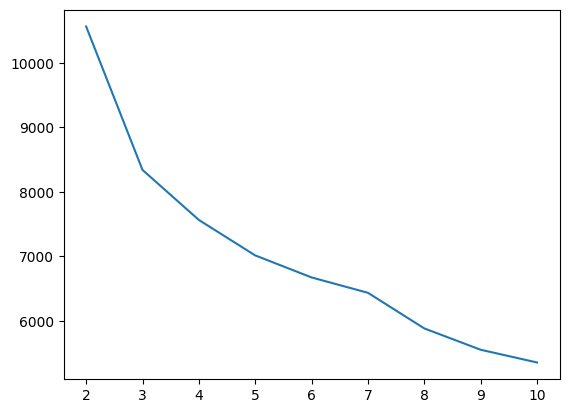

In [116]:
sns.lineplot(x=k_vals,y=inertias) #3 or 4 is best

In [137]:
best = KMeans(n_clusters=4, random_state=42)
df_model['cluster'] = best.fit_predict(X)

In [121]:
df_model.head()

,housing_tenure_type,customer_relation_status_type,median_cust,count_cust,cluster
customer,,,,,
0534a101-8ddc-4719-81f3-8dd4fd034ada,Rents house,Customer,179.8500,1.0,1
a9151364-778a-469f-8b68-d94d40da9c7d,Does not own house (no longer active),Prospective customer,286.5200,1.0,1
7317591a-3283-4aa4-a212-ab7c9d361cb6,Lives in,Prospective customer,445.8875,2.0,0
bfddc3d9-9ee3-4c2a-b94d-62046808593f,Does not own house (no longer active),Prospective customer,352.1250,2.0,0
32d4d3a5-98dd-4c3c-a4ce-b832c8776e4b,Owns house,Ex customer,199.3800,1.0,1


<Axes: xlabel='count_cust', ylabel='median_cust'>

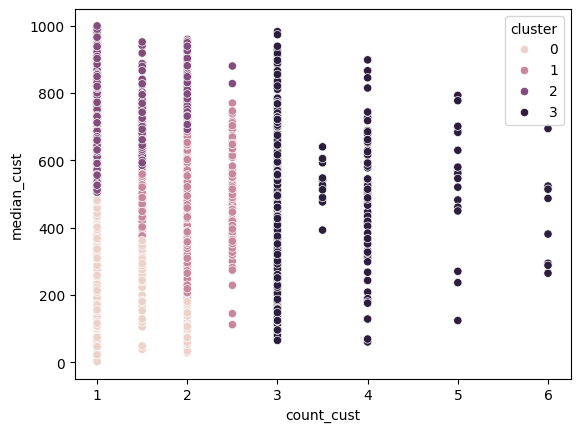

In [138]:
sns.scatterplot(data = df_model ,x='count_cust',y='median_cust', hue = 'cluster')

In [139]:
pd.crosstab(df_model['housing_tenure_type'], df_model['cluster'], normalize='columns').round(3)

cluster,0,1,2,3
housing_tenure_type,,,,
Does not own house (no longer active),0.176,0.154,0.184,0.169
Lives in,0.098,0.121,0.119,0.106
Owns house,0.303,0.307,0.275,0.315
Rents house,0.074,0.073,0.074,0.065
Unknown,0.348,0.345,0.347,0.344


In [140]:
pd.crosstab(df_model['customer_relation_status_type'], df_model['cluster'], normalize='columns').round(3)

cluster,0,1,2,3
customer_relation_status_type,,,,
Customer,0.491,0.481,0.454,0.500
Ex customer,0.347,0.337,0.338,0.337
Prospective customer,0.162,0.183,0.208,0.163


In [141]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PCA1','PCA2'], index=df_model.index)
df_pca['cluster'] = df_model['cluster']

<Axes: xlabel='PCA1', ylabel='PCA2'>

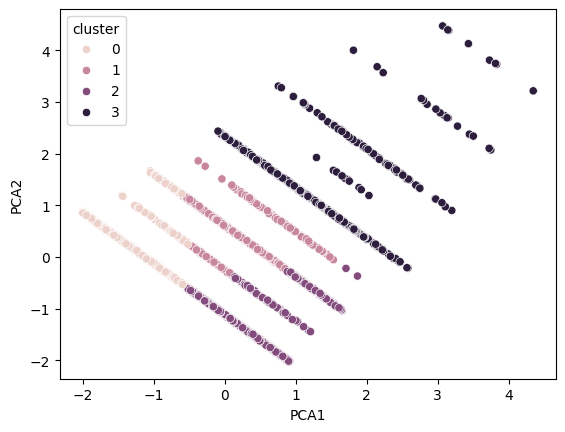

In [142]:
sns.scatterplot(data=df_pca, x = 'PCA1', y = 'PCA2', hue='cluster')

- conclusions:
    - PCA almost one dimensional
    - model would improve with better trx based features, count feature being discrete could distort
        - eg., min,max counts or based on months
    - clusters do not meaningfully differ accross categorical features
    - would remove ex customers as they are maybe not so interesting from a monitoring perspective